IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn


IMPORTING OUR DATASET, THYROIDCASES. CSV FILE 

In [2]:
thyroidCases = pd.read_csv("E:/Trimester8/DWDM/MiniProject/Group09_DWDM_MiniProject_DataSet.csv")

In [3]:
thyroidCases.isnull()

,NAME,AGE,SEX,ADDRESS,DEPARTMENT,CR NO.,DAYS OF ADMISSION,DOA,DIAGNOSIS,OPERATED,DOD,THYROID PROFILE: T3,THYROID PROFILE: TSH,HB,WBC,PLT,COMORBIDITIES,RADIODIAGNOSTICS
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [4]:
thyroidCases.notnull()

,NAME,AGE,SEX,ADDRESS,DEPARTMENT,CR NO.,DAYS OF ADMISSION,DOA,DIAGNOSIS,OPERATED,DOD,THYROID PROFILE: T3,THYROID PROFILE: TSH,HB,WBC,PLT,COMORBIDITIES,RADIODIAGNOSTICS
0,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
97,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
98,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
99,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True


In [5]:
for col in thyroidCases.columns:
    print(col)

NAME
AGE
SEX
ADDRESS
DEPARTMENT
CR NO.
DAYS OF ADMISSION
DOA
DIAGNOSIS
OPERATED
DOD
THYROID PROFILE: T3
THYROID PROFILE: TSH
HB
WBC
PLT
COMORBIDITIES
RADIODIAGNOSTICS


***
>>LABEL ENCODING

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(thyroidCases['SEX'])
print("Sample y:", Y[:1])
print("0 :", labelencoder_y.classes_[0])
print("1 :", labelencoder_y.classes_[1])
thyroidCases["Encoded SEX"] = Y
thyroidCases

Sample y: [1]
0 : F
1 : M


,NAME,AGE,SEX,ADDRESS,DEPARTMENT,CR NO.,DAYS OF ADMISSION,DOA,DIAGNOSIS,OPERATED,DOD,THYROID PROFILE: T3,THYROID PROFILE: TSH,HB,WBC,PLT,COMORBIDITIES,RADIODIAGNOSTICS,Encoded SEX
0,Veer,67,M,Mohri,ENT,21100458,3,12-10-2021,Hypothyroidism,NaN,15-10-2021,4,3,11,4000,2,DM,FNAC,1
1,Amar,45,M,Panipat,ENT,21100469,5,12-10-2021,Graves Disease,NaN,17-10-2021,6,3,12,3000,3,NONE,USG,1
2,Jasleen,24,M,Mohra,ENT,21100480,2,12-10-2021,Colloid Goitre,NaN,14-10-2021,4,4,13,5000,4,HTN,USG,1
3,Ajeet,34,F,Shahbad,ENT,21100491,12,12-10-2021,Solitary nodule thyroid,NaN,24-10-2021,3,6,9,4000,3,"DM,HTN",NONE,0
4,Akal,12,M,Panipat,ENT,21100502,10,12-10-2021,Hyperthyroidism,NaN,22-10-2021,6,8,11,4000,2,"CVD, DM",CT SCAN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Sundarbir,78,M,Mohri,ENT,21101514,13,22-10-2021,Hyperthyroidism,NaN,04-11-2021,5,4,8,2000,4,DM,USG,1
97,Sumatbit,67,F,Shahbad,ENT,21101525,2,22-10-2021,Solitary nodule thyroid,NaN,24-10-2021,5,8,7,4000,3,NONE,FNAC,0
98,Sumanpreet,45,M,Shahbad,ENT,21101536,1,22-10-2021,Colloid Goitre,NaN,23-10-2021,4,6,13,1100,1,CVD,USG,1
99,Jatinder,24,F,Mohri,ENT,21101547,10,22-10-2021,Hypothyroidism,NaN,01-11-2021,5,4,12,4200,3,NONE,NONE,0


***
>> Z score normalization

Z-Score helps in the normalization of data. If we normalize the data into a simpler form with the help of z score normalization, then it’s very easy to understand by a model

In [7]:
from scipy import stats

newthyroidcases = pd.DataFrame()
newthyroidcases['NAME'] = thyroidCases['NAME']
newthyroidcases['AGE'] = thyroidCases['AGE']
newthyroidcases['Encoded SEX'] = thyroidCases['Encoded SEX']

newthyroidcases['THYROID PROFILE: T3'] = stats.zscore(
    thyroidCases['THYROID PROFILE: T3'])
newthyroidcases['THYROID PROFILE: TSH'] = stats.zscore(
    thyroidCases['THYROID PROFILE: TSH'])

newthyroidcases['HB'] = stats.zscore(thyroidCases['HB'])
newthyroidcases['PLT'] = stats.zscore(thyroidCases['PLT'])
newthyroidcases['WBC'] = stats.zscore(thyroidCases['WBC'])

newthyroidcases


,NAME,AGE,Encoded SEX,THYROID PROFILE: T3,THYROID PROFILE: TSH,HB,PLT,WBC
0,Veer,67,1,-0.820080,-1.003524,0.011755,-0.818182,0.426837
1,Amar,45,1,0.633044,-1.003524,0.407495,0.329545,-0.458390
2,Jasleen,24,1,-0.820080,-0.410799,0.803236,1.477273,1.312064
3,Ajeet,34,0,-1.546643,0.774650,-0.779727,0.329545,0.426837
4,Akal,12,1,0.633044,1.960099,0.011755,-0.818182,0.426837
...,...,...,...,...,...,...,...,...
96,Sundarbir,78,1,-0.093518,-0.410799,-1.175468,1.477273,-1.343617
97,Sumatbit,67,0,-0.093518,1.960099,-1.571209,0.329545,0.426837
98,Sumanpreet,45,1,-0.820080,0.774650,0.803236,-1.965909,-2.140321
99,Jatinder,24,0,-0.093518,-0.410799,0.407495,0.329545,0.603882


HERE, WE CAN SEE THAT HYPERTHYROIDSIM IS THE MOST FREQUENTLY OCCURING DISEASE AND THYROID STORM IS THE LEAST FREQUENTLY OCCURING DISEASE

In [8]:
thyroidCases['DIAGNOSIS'].value_counts()


DIAGNOSIS
Hypothyroidism             33
Hyperthyroidism            24
Solitary nodule thyroid    18
Colloid Goitre             16
Multinodular Goitre         7
Graves Disease              2
Thyroid Storm               1
Name: count, dtype: int64

In [9]:
thyroidCases['DIAGNOSIS'].value_counts().idxmax()
# thyroidCases['DIAGNOSIS'].value_counts().idxmin()


'Hypothyroidism'

***
>> HISTOGRAM

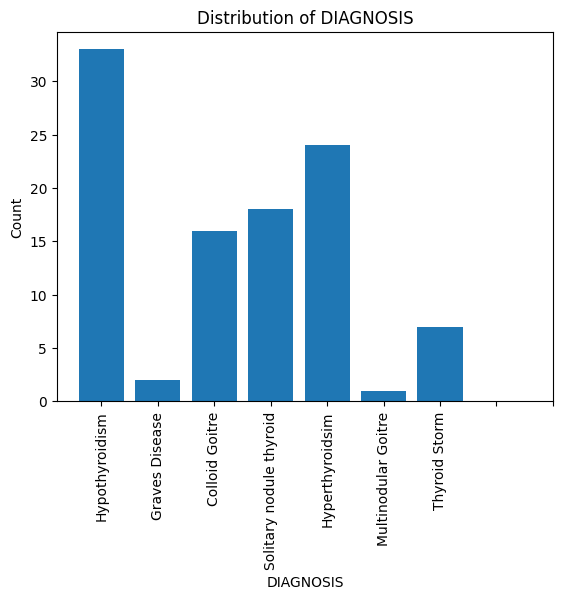

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the "DIAGNOSIS" column to string data type
thyroidCases["DIAGNOSIS"] = thyroidCases["DIAGNOSIS"].astype(str, copy=True)

# Plot a histogram of the "DIAGNOSIS" column
plt.hist(thyroidCases["DIAGNOSIS"], bins=range(9), rwidth=0.8, align='left')

# Add labels to the axes and a title
plt.xlabel("DIAGNOSIS")
plt.ylabel("Count")
plt.title("Distribution of DIAGNOSIS")

# Set the x-axis tick labels to the values of "duration"
duration = ['Hypothyroidism', 'Graves Disease', 'Colloid Goitre', 'Solitary nodule thyroid',
            'Hyperthyroidsim', 'Multinodular Goitre', 'Thyroid Storm', '', '']
plt.xticks(range(len(duration)), duration, rotation=90)

# Show the plot
plt.show()


***
>> 1) CORRELATION MATRIX TECHNIQUES 

B) POSITIVE CORRELATION


When two variables increase together and decrease together. They are positively correlated. ‘1’ is a perfect positive correlation.



In [11]:
import pandas as pd
import numpy as np

# Create a dataframe with the Thyroid Profile and Age variables
df = pd.DataFrame({'Thyroid_Profile': [4, 6, 4, 3, 6, 6, 11, 4, 5, 6, 6, 7, 5], 'Age': [
                  67, 45, 24, 34, 12, 56, 67, 56, 35, 78, 62, 49, 24]})

# Calculate the correlation coefficient between Thyroid Profile and Age
correlation = df['Thyroid_Profile'].corr(df['Age'])

# Check if correlation is positive and if it is significant
if correlation > 0 and abs(correlation) > 0.5:
    print('The correlation between Thyroid Profile(TSH) and Age is significant and positive: {:.2f}'.format(
        correlation))
elif correlation > 0:
    print('The correlation between Thyroid Profile(TSH) and Age is positive but not significant: {:.2f}'.format(
        correlation))
else:
    print('The correlation between Thyroid Profile(TSH) and Age is negative: {:.2f}'.format(
        correlation))


The correlation between Thyroid Profile(TSH) and Age is positive but not significant: 0.35


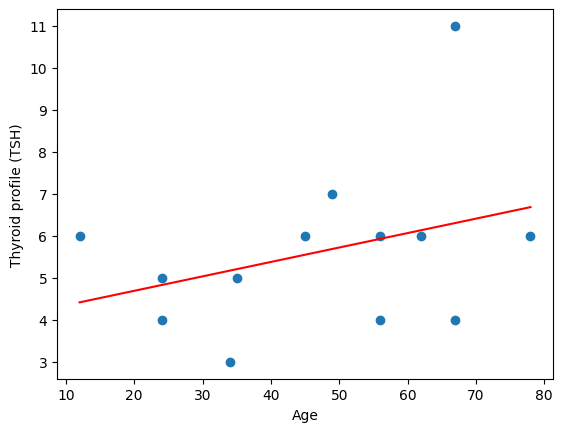

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataframe with the Thyroid Profile and Age variables
y = pd.Series([4, 6, 4, 3, 6, 6, 11, 4, 5, 6, 6, 7, 5])
x = pd.Series([67, 45, 24, 34, 12, 56, 67, 56, 35, 78, 62, 49, 24])

# Plot the data
plt.scatter(x, y)

# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Thyroid profile (TSH)')

# Fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color="red")

# Show the plot
plt.show()


C) SEABORN CORRELATION (HEAT MAP)

A heat map (or heatmap) is a data visualization
technique that shows magnitude of a phenomenon as
color in two dimensions. The variation in color may be
by hue or intensity, giving obvious visual cues to the
reader about how the phenomenon is clustered or
varies over space. Correlation between parameters of
our dataset is interpreted and pictorial view is obtained
as shown

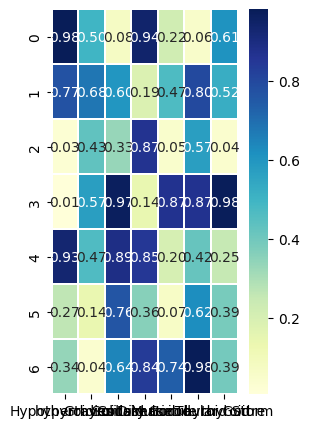

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset
df = pd.DataFrame(np.random.random((7, 7)), columns=[
    "Hypothyroidism",
    "hyperthyroidsim",
    "Graves Disease",
    "Colloid Goitre",
    "Solitary nodule thyroid",
    "Multinodular Goitre",
    "Thyroid Storm"])

# Increase the size of the figure
plt.figure(figsize=(3, 5))

# Customize the heatmap
sns.heatmap(df, cmap="YlGnBu", annot=True,
            fmt=".2f", square=False, linewidths=0.1, xticklabels=True)

# Rotate x-axis tick labels
plt.xticks(rotation=0)

# Show the plot
plt.show()


***
>> 2) STATISTICAL TECHNIQUES:


A) LINEAR REGRESSION

linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other.

For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

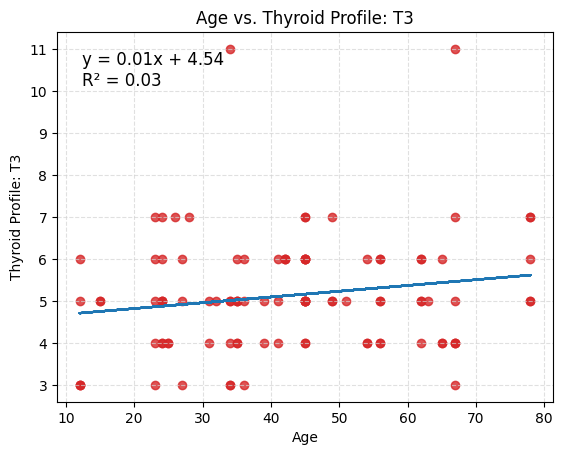

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Fit a linear regression model
X = thyroidCases[["AGE"]]
y = thyroidCases[["THYROID PROFILE: T3"]]
regressor = LinearRegression()
regressor.fit(X, y)

# Plot the data points and the regression line
plt.scatter(X, y, color="tab:red", alpha=0.8)
plt.plot(X, regressor.predict(X), color="tab:blue")

# Add a title and axis labels
plt.title("Age vs. Thyroid Profile: T3")
plt.xlabel("Age")
plt.ylabel("Thyroid Profile: T3")

# Add grid lines
plt.grid(True, linestyle="--", color="lightgray", alpha=0.7)

# Add the regression equation and R squared value to the plot
eq = "y = {:.2f}x + {:.2f}".format(
    regressor.coef_[0][0], regressor.intercept_[0])
rsq = "R² = {:.2f}".format(regressor.score(X, y))
plt.text(0.05, 0.95, eq + "\n" + rsq, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment="top")

# Show the plot
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = thyroidCases.iloc[:, [1, 11, 12, 13, 14, 18]].values
Y = thyroidCases.iloc[:, 8].values

test_sizes = np.linspace(0.05, 0.35, 50)
random_states = np.random.randint(low=1, high=300, size=50)

results = []
for ts in test_sizes:
    for rs in random_states:
        X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=ts, random_state=rs)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        logistic_regression = LogisticRegression(max_iter=5000)
        logistic_regression.fit(X_train, y_train)
        accuracy = logistic_regression.score(X_test, y_test)
        results.append(
            {'test_size': ts, 'random_state': rs, 'accuracy': accuracy, 'params': {'max_iter': 5000}})

# Sort the results by accuracy and show the top 5
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)[:2]
print("Top 2 accuracy scores:")
for i, res in enumerate(sorted_results):
    print(
        f"{i+1}. Test Size: {res['test_size']:.2f}, Random State: {res['random_state']}, Accuracy: {res['accuracy']*100:.2f}%")


Top 2 accuracy scores:
1. Test Size: 0.05, Random State: 166, Accuracy: 66.67%
2. Test Size: 0.06, Random State: 166, Accuracy: 66.67%


***
>> 3) LINEAR REGRESSION

Linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

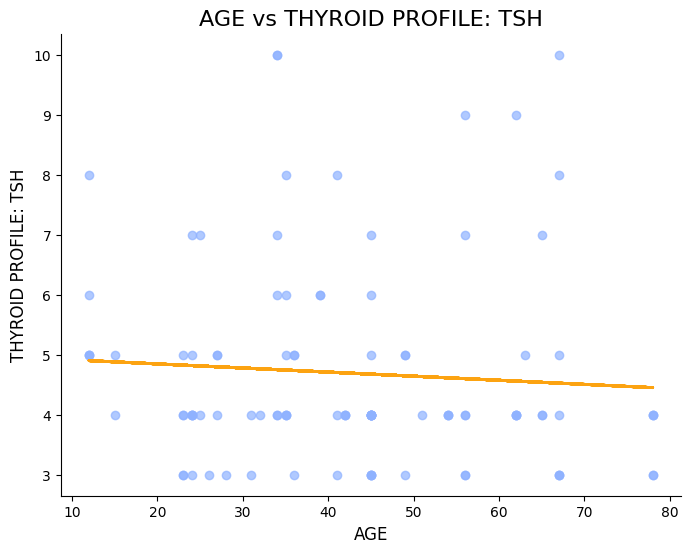

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Extract the relevant columns
X = thyroidCases[["AGE"]]
y = thyroidCases[["THYROID PROFILE: TSH"]]

# Create the linear regression model and fit the data
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plot the data and the regression line
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color='#8fb2ff', alpha=0.7)
ax.plot(X, regressor.predict(X), color='#fca311', linewidth=2)

# Customize the plot
ax.set_title('AGE vs THYROID PROFILE: TSH', fontsize=16)
ax.set_xlabel('AGE', fontsize=12)
ax.set_ylabel('THYROID PROFILE: TSH', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.show()


***
>> LINEAR REGRESSION (MODEL 1)

WITHOUT USING NORMALIZED VALUES

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

X = thyroidCases.iloc[:, [1, 11, 12, 13, 14, 15,  18]].values
Y = thyroidCases.iloc[:, 8].values

labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

results = []
for i in range(2000):
    test_size = random.uniform(0.01, 0.35)
    random_state = random.randint(0, 100)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train, Y_train)
    score = linear_regressor.score(X_test, Y_test) * 100
    results.append((score, test_size, random_state))

top_results = sorted(results, reverse=True)[:5]
for i, result in enumerate(top_results):
    print(
        f"Rank {i+1}: Test size={result[1]:.2f}, Random state={result[2]}, Accuracy={result[0]:.2f}%")


Rank 1: Test size=0.03, Random state=63, Accuracy=94.65%
Rank 2: Test size=0.03, Random state=63, Accuracy=94.40%
Rank 3: Test size=0.01, Random state=6, Accuracy=87.77%
Rank 4: Test size=0.03, Random state=55, Accuracy=65.14%
Rank 5: Test size=0.03, Random state=55, Accuracy=65.14%


USING NORMALIZED VALUES

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
import random

X = newthyroidcases.iloc[:, [1, 2, 3, 4, 5, 6, 7]].values
Y = thyroidCases.iloc[:, 8].values
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

top_results = []
for i in range(3000):
    test_size = random.uniform(0.01, 0.35)
    random_state = random.randint(0, 1001)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state)

    # Try different values for hyperparameters in each iteration
    max_iter = random.randint(1000, 10000)
    tol = random.uniform(1e-5, 1e-2)
    loss = random.choice(
        ['squared_error', 'huber', 'squared_epsilon_insensitive'])
    penalty = random.choice(['l2', 'l1', 'elasticnet'])
    alpha = random.uniform(1e-5, 1e-3)
    l1_ratio = random.uniform(0, 1)

    pipeline = make_pipeline(StandardScaler(), SGDRegressor(
        max_iter=max_iter, tol=tol, loss=loss, penalty=penalty, alpha=alpha, l1_ratio=l1_ratio))
    pipeline.fit(X_train, Y_train)
    score = pipeline.score(X_test, Y_test) * 100
    top_results.append((score, test_size, random_state,
                       max_iter, tol, loss, penalty, alpha, l1_ratio))

top_results = sorted(top_results, reverse=True)[:2]
for i, result in enumerate(top_results):
    print(
        f"Rank {i+1}: Test size={result[1]:.2f}, Random state={result[2]}, Accuracy={result[0]:.2f}%, max_iter={result[3]}, tol={result[4]:.5f}, loss={result[5]}, penalty={result[6]}, alpha={result[7]:.5f}, l1_ratio={result[8]:.5f}")


Rank 1: Test size=0.01, Random state=968, Accuracy=89.69%, max_iter=3608, tol=0.00396, loss=squared_error, penalty=l1, alpha=0.00054, l1_ratio=0.30351
Rank 2: Test size=0.01, Random state=783, Accuracy=69.15%, max_iter=4363, tol=0.00731, loss=squared_epsilon_insensitive, penalty=l1, alpha=0.00006, l1_ratio=0.32037


***
>> DECISION TREE (MODEL 2)

In [19]:
thyroidCases.columns


Index(['NAME', 'AGE', 'SEX', 'ADDRESS', 'DEPARTMENT', 'CR NO.',
       'DAYS OF ADMISSION', 'DOA', 'DIAGNOSIS', 'OPERATED', 'DOD',
       'THYROID PROFILE: T3', 'THYROID PROFILE: TSH', 'HB', 'WBC', 'PLT',
       'COMORBIDITIES', 'RADIODIAGNOSTICS', 'Encoded SEX'],
      dtype='object')

>>DECISION TREE CLASSIFIER

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import random

# same for normalized values also

X = thyroidCases.iloc[:, [1, 11, 18]].values
Y = thyroidCases.iloc[:, 8].values
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

top_results = []
for i in range(500):
    test_size = random.uniform(0.01, 0.25)
    random_state = random.randint(0, 201)
    max_depth = random.randint(1, 30)
    min_samples_split = random.randint(2, 10)
    min_samples_leaf = random.randint(1, 5)
    pipeline = make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=random_state))
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state)
    pipeline.fit(X_train, Y_train)
    score = pipeline.score(X_test, Y_test) * 100
    top_results.append((score, test_size, random_state,
                       max_depth, min_samples_split, min_samples_leaf))

top_results = sorted(top_results, reverse=True)[:2]
for i, result in enumerate(top_results):
    print(
        f"Rank {i+1}: Test size={result[1]:.2f}, Random state={result[2]}, Max depth={result[3]}, Min samples split={result[4]}, Min samples leaf={result[5]}, Accuracy={result[0]:.2f}%")


Rank 1: Test size=0.02, Random state=138, Max depth=3, Min samples split=7, Min samples leaf=1, Accuracy=100.00%
Rank 2: Test size=0.08, Random state=94, Max depth=1, Min samples split=3, Min samples leaf=3, Accuracy=77.78%


>>DECISION TREE REGRESSOR

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import random

# same for normalized values also
X = thyroidCases.iloc[:, [1, 11, 12, 13, 14, 15,  18]].values
Y = thyroidCases.iloc[:, 8].values
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

top_results = []
for i in range(3000):
    test_size = random.uniform(0.01, 0.35)
    random_state = random.randint(0, 1001)
    max_depth = random.randint(1, 30)
    min_samples_split = random.randint(2, 10)
    min_samples_leaf = random.randint(1, 5)
    pipeline = make_pipeline(
        StandardScaler(),
        DecisionTreeRegressor(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=random_state))
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state)
    pipeline.fit(X_train, Y_train)
    score = pipeline.score(X_test, Y_test) * 100
    top_results.append((score, test_size, random_state,
                       max_depth, min_samples_split, min_samples_leaf))

top_results = sorted(top_results, reverse=True)[:2]
for i, result in enumerate(top_results):
    print(
        f"Rank {i+1}: Test size={result[1]:.2f}, Random state={result[2]}, Max depth={result[3]}, Min samples split={result[4]}, Min samples leaf={result[5]}, Accuracy={result[0]:.2f}%")


Rank 1: Test size=0.03, Random state=179, Max depth=10, Min samples split=2, Min samples leaf=1, Accuracy=100.00%
Rank 2: Test size=0.02, Random state=474, Max depth=21, Min samples split=2, Min samples leaf=4, Accuracy=100.00%


***
>> DECISION TREE GRADIENT BOOSTING

important Parameters
* n_estimators: number of weak learners to train iteratively
* learning_rate: it contributes to the weight of weak learners.it uses 1 as default

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

thyroidCases.columns


Index(['NAME', 'AGE', 'SEX', 'ADDRESS', 'DEPARTMENT', 'CR NO.',
       'DAYS OF ADMISSION', 'DOA', 'DIAGNOSIS', 'OPERATED', 'DOD',
       'THYROID PROFILE: T3', 'THYROID PROFILE: TSH', 'HB', 'WBC', 'PLT',
       'COMORBIDITIES', 'RADIODIAGNOSTICS', 'Encoded SEX'],
      dtype='object')

In [23]:
import random
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

X = thyroidCases.iloc[:, [1, 11, 12, 13, 14, 18]].values
Y = thyroidCases.iloc[:, 8].values

best_test_size = 0
best_random_state = 0
best_accuracy = 0

for i in range(50):
    test_size = round(random.uniform(0.1, 0.35), 10)
    random_state = random.randint(0, 350)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state)

    gradientclassifier = GradientBoostingClassifier(
        max_depth=10, n_estimators=200, learning_rate=0.1, random_state=42)

    # Train gradient boost regressor
    model = gradientclassifier.fit(X_train, Y_train)

    # Predict the response for the dataset
    accuracy = model.score(X_test, Y_test) * 100

    if accuracy > best_accuracy:
        best_test_size = test_size
        best_random_state = random_state
        best_accuracy = accuracy

print(
    f"1st place: Test size={best_test_size}, Random state={best_random_state}, Accuracy={best_accuracy:.2f}%")

for i in range(30):
    test_size = round(random.uniform(0.05, 0.35), 10)
    random_state = random.randint(0, 350)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state)

    gradientclassifier = GradientBoostingClassifier(
        max_depth=10, n_estimators=200, learning_rate=0.1, random_state=42)

    # Train gradient boost regressor
    model = gradientclassifier.fit(X_train, Y_train)

    # Predict the response for the dataset
    accuracy = model.score(X_test, Y_test) * 100

    if accuracy > best_accuracy:
        best_test_size = test_size
        best_random_state = random_state
        best_accuracy = accuracy

print(
    f"2nd place: Test size={best_test_size}, Random state={best_random_state}, Accuracy={best_accuracy:.2f}%")


1st place: Test size=0.1544399081, Random state=20, Accuracy=43.75%
2nd place: Test size=0.065212664, Random state=291, Accuracy=57.14%


***
>> SUPPORT VECTOR MACHINE (MODEL 3)



USING NOT NORMALIZED COLUMNS 

In [24]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import random
import pandas as pd

# set the values for the test sizes and random states
test_sizes = [round(x, 2) for x in list(
    random.uniform(0.01, 0.45) for i in range(40))]
random_states = random.sample(range(1, 600), 40)

# create a dictionary to store the accuracy scores for each combination of test size and random state
accuracy_scores = {}

# iterate through the test sizes and random states
for test_size in test_sizes:
    for random_state in random_states:
        # split the data into training and testing sets
        X = thyroidCases.iloc[:, [1, 11, 12, 13, 14, 15, 18]].values
        Y = thyroidCases.iloc[:, 8].values
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=test_size, random_state=random_state)

        # perform resampling on the training data
        rus = RandomUnderSampler(sampling_strategy='majority')
        X_train_resampled, Y_train_resampled = rus.fit_resample(
            X_train, Y_train)

        ros = RandomOverSampler(sampling_strategy='minority')
        X_train_resampled, Y_train_resampled = ros.fit_resample(
            X_train_resampled, Y_train_resampled)

        # fit the SVM model and make predictions
        clf = svm.SVC(max_iter=10000, kernel='rbf', C=1, gamma='scale')
        clf.fit(X_train_resampled, Y_train_resampled)
        Y_pred = clf.predict(X_test)

        # calculate and store the accuracy score for this combination of test size and random state
        accuracy = clf.score(X_test, Y_test)*100
        accuracy_scores[(test_size, random_state)] = accuracy


# sort the accuracy scores in descending order and print the top 2 accuracy scores along with hyperparameters
sorted_scores = sorted(accuracy_scores.items(),
                       key=lambda x: x[1], reverse=True)
print("Top 2 accuracy scores:")
for i in range(2):
    print(
        f"{i+1}. Test size: {sorted_scores[i][0][0]}, Random state: {sorted_scores[i][0][1]}, Accuracy: {round(sorted_scores[i][1], 2)}%, Kernel: {'rbf'}, C: {1}, Gamma: {'scale'}, Max iterations: {10000}")


Top 2 accuracy scores:
1. Test size: 0.02, Random state: 165, Accuracy: 100.0%, Kernel: rbf, C: 1, Gamma: scale, Max iterations: 10000
2. Test size: 0.02, Random state: 377, Accuracy: 100.0%, Kernel: rbf, C: 1, Gamma: scale, Max iterations: 10000


USING NORMALIZED COLUMNS 

In [25]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import random

# Set the values for the test sizes and random states
test_sizes = [round(x, 2)
              for x in list(random.uniform(0.01, 0.45) for i in range(60))]
random_states = random.sample(range(1, 1000), 60)

# Create a dictionary to store the accuracy scores for each combination of test size and random state
accuracy_scores = {}

# Iterate through the test sizes and random states
X = newthyroidcases.iloc[:, [2, 3, 4, 5, 6, 7]].values
Y = thyroidCases.iloc[:, 8].values
for test_size in test_sizes:
    for random_state in random_states:
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=test_size, random_state=random_state)

        # Fit the SVM model and make predictions
        clf = svm.SVC(max_iter=10000)
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)

        # Calculate and store the accuracy score for this combination of test size and random state
        accuracy = clf.score(X_test, Y_test)*100
        accuracy_scores[(test_size, random_state)] = accuracy

# Sort the accuracy scores in descending order and print the top 2
sorted_scores = sorted(accuracy_scores.items(),
                       key=lambda x: x[1], reverse=True)
print("Top 2 accuracy scores:")
for i in range(2):
    print(
        f"{i+1}. Test size: {sorted_scores[i][0][0]}, Random state: {sorted_scores[i][0][1]}, Accuracy: {sorted_scores[i][1]}%")
    print(f"    SVM Hyperparameters: {clf.get_params()}")


Top 2 accuracy scores:
1. Test size: 0.03, Random state: 269, Accuracy: 100.0%
    SVM Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 10000, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
2. Test size: 0.05, Random state: 947, Accuracy: 83.33333333333334%
    SVM Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 10000, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


***
>>LOGISTICAL REGRESSION (MODEL 4)

WIHTOUT NORMALIZATION 

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = thyroidCases.iloc[:, [1, 11, 12, 13, 14, 18]].values
Y = thyroidCases.iloc[:, 8].values

test_sizes = [round(x, 2) for x in list(np.random.uniform(0.01, 0.3, 30))]
random_states = np.random.randint(1, 1001, 30)

results = []
for ts in test_sizes:
    for rs in random_states:
        X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=ts, random_state=rs)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        max_iter = np.random.randint(1000, 10000)
        C = np.random.uniform(0.01, 10)
        solver = np.random.choice(['lbfgs', 'newton-cg', 'liblinear'])
        logistic_regression = LogisticRegression(
            max_iter=max_iter, C=C, solver=solver)
        logistic_regression.fit(X_train, y_train)
        accuracy = logistic_regression.score(X_test, y_test)
        results.append(
            {'test_size': ts, 'random_state': rs, 'accuracy': accuracy, 'params': {'max_iter': max_iter, 'C': C, 'solver': solver}})

# Sort the results by accuracy and show the top 2 along with their hyperparameters
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)[:2]
print("Top 2 accuracy scores:")
for i, res in enumerate(sorted_results):
    print(
        f"{i+1}. Test Size: {res['test_size']:.2f}, Random State: {res['random_state']}, Accuracy: {res['accuracy']*100:.2f}%, Hyperparameters: {res['params']}")


Top 2 accuracy scores:
1. Test Size: 0.01, Random State: 735, Accuracy: 100.00%, Hyperparameters: {'max_iter': 5871, 'C': 1.7594123796311834, 'solver': 'liblinear'}
2. Test Size: 0.01, Random State: 361, Accuracy: 100.00%, Hyperparameters: {'max_iter': 3308, 'C': 7.263267184648396, 'solver': 'lbfgs'}


WITH NORMALIZATION 

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = newthyroidcases.iloc[:, [2, 3, 4, 5]].values
Y = thyroidCases.iloc[:, 8].values

test_sizes = np.linspace(0.01, 0.2, 30)
random_states = np.random.randint(low=1, high=1000, size=30)

results = []
for ts in test_sizes:
    for rs in random_states:
        X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=ts, random_state=rs)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        logistic_regression = LogisticRegression(max_iter=10000)
        logistic_regression.fit(X_train, y_train)
        accuracy = logistic_regression.score(X_test, y_test)
        results.append(
            {'test_size': ts, 'random_state': rs, 'accuracy': accuracy, 'params': {'max_iter': 10000}})

# Sort the results by accuracy and show the top 5
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)[:2]
print("Top 2 accuracy scores:")
for i, res in enumerate(sorted_results):
    print(
        f"{i+1}. Test Size: {res['test_size']:.2f}, Random State: {res['random_state']}, Accuracy: {res['accuracy']*100:.2f}%")


Top 2 accuracy scores:
1. Test Size: 0.01, Random State: 12, Accuracy: 100.00%
2. Test Size: 0.01, Random State: 805, Accuracy: 100.00%
